## Context

This dataset includes descriptions of hypothetical samples corresponding to 23 species of gilled mushrooms in the Agaricus and Lepiota Family Mushroom drawn from The Audubon Society Field Guide to North American Mushrooms (1981). Each species is identified as definitely edible, definitely poisonous, or of unknown edibility and not recommended. This latter class was combined with the poisonous one. The Guide clearly states that there is no simple rule for determining the edibility of a mushroom; no rule like "leaflets three, let it be'' for Poisonous Oak and Ivy.

## Source of Dataset

Although this dataset was originally contributed to the UCI Machine Learning repository nearly 30 years ago, mushroom hunting (otherwise known as "shrooming") is enjoying new peaks in popularity.

## Number of Dataset
- Number of Dataset =  8124
- classes: edible=e, poisonous=p
- Poisonous = 1
- Eatable = 0

## Attribute Information
- cap-shape: bell=b,conical=c,convex=x,flat=f, knobbed=k,sunken=s
- cap-surface: fibrous=f,grooves=g,scaly=y,smooth=s
- cap-color: brown=n,buff=b,cinnamon=c,gray=g,green=r,pink=p,purple=u,red=e,white=w,yellow=y
- bruises: bruises=t,no=f
- odor: almond=a,anise=l,creosote=c,fishy=y,foul=f,musty=m,none=n,pungent=p,spicy=s
- gill-attachment: attached=a,descending=d,free=f,notched=n
- gill-spacing: close=c,crowded=w,distant=d
- gill-size: broad=b,narrow=n
- gill-color: black=k,brown=n,buff=b,chocolate=h,gray=g, 
- green=r,orange=o,pink=p,purple=u,red=e,white=w,yellow=y
- stalk-shape: enlarging=e,tapering=t
- stalk-root: bulbous=b,club=c,cup=u,equal=e,rhizomorphs=z,rooted=r
- stalk-surface-above-ring: fibrous=f,scaly=y,silky=k,smooth=s
- stalk-surface-below-ring: fibrous=f,scaly=y,silky=k,smooth=s
- stalk-color-above-ring: brown=n,buff=b,cinnamon=c,gray=g,orange=o,pink=p,red=e,white=w,yellow=y
- stalk-color-below-ring: brown=n,buff=b,cinnamon=c,gray=g,orange=o,pink=p,red=e,white=w,yellow=y
- veil-type: partial=p,universal=u
- veil-color: brown=n,orange=o,white=w,yellow=y
- ring-number: none=n,one=o,two=t
- ring-type: cobwebby=c,evanescent=e,flaring=f,large=l,none=n,pendant=p,sheathing=s,zone=z
- spore-print-color: black=k,brown=n,buff=b,chocolate=h,green=r,orange=o,purple=u,white=w,yellow=y
- population: abundant=a,clustered=c,numerous=n,scattered=s,several=v,solitary=y
- habitat: grasses=g,leaves=l,meadows=m,paths=p,urban=u,waste=w,woods=d

## Method

I'm going to apply 6 supervised machine learning classification models and an ANN model on the given dataset to classify mushrooms as poisonous or eatable.
1. Logistic Regression
2. Support Vector machines (SVC)
3. K-Nearest Neighbours(K-NN)
4. Naive Bayes classifier
5. Decision Tree Classifier
6. Random Forest Classifier

I'll proceed by converting categorical variables into dummy/indicator variables, then reducing dimensions using Princple Component Analysis to reduce 23 categorical variables (which will become 95 variables after conversion)
to only 2 variables (Principle Components) and training different classification models over these two principle components. 

### Importing the Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

C:\Users\BRI\Anaconda3\lib\site-packages\statsmodels\tools\_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


### Importing the Dataset

In [2]:
# load dataset
dataset = pd.read_csv('data/mushrooms.csv', sep=',')

print ('Data read into a pandas dataframe!')

Data read into a pandas dataframe!


In [3]:
#check sample dataset
dataset.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g


### Info of Dataset

In [4]:
#check data type field
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8124 entries, 0 to 8123
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   class                     8124 non-null   object
 1   cap-shape                 8124 non-null   object
 2   cap-surface               8124 non-null   object
 3   cap-color                 8124 non-null   object
 4   bruises                   8124 non-null   object
 5   odor                      8124 non-null   object
 6   gill-attachment           8124 non-null   object
 7   gill-spacing              8124 non-null   object
 8   gill-size                 8124 non-null   object
 9   gill-color                8124 non-null   object
 10  stalk-shape               8124 non-null   object
 11  stalk-root                8124 non-null   object
 12  stalk-surface-above-ring  8124 non-null   object
 13  stalk-surface-below-ring  8124 non-null   object
 14  stalk-color-above-ring  

### Checking for nulls

In [5]:
#check data null each field
dataset.isna().sum()

class                       0
cap-shape                   0
cap-surface                 0
cap-color                   0
bruises                     0
odor                        0
gill-attachment             0
gill-spacing                0
gill-size                   0
gill-color                  0
stalk-shape                 0
stalk-root                  0
stalk-surface-above-ring    0
stalk-surface-below-ring    0
stalk-color-above-ring      0
stalk-color-below-ring      0
veil-type                   0
veil-color                  0
ring-number                 0
ring-type                   0
spore-print-color           0
population                  0
habitat                     0
dtype: int64

### Class column is response and rest columns are predictors.
### Seprating Predictors and Response

In [6]:
X=dataset.drop('class',axis=1) #Predictors
y=dataset['class'] #Response
X.head()

,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,x,s,n,t,p,f,c,n,k,e,...,s,w,w,p,w,o,p,k,s,u
1,x,s,y,t,a,f,c,b,k,e,...,s,w,w,p,w,o,p,n,n,g
2,b,s,w,t,l,f,c,b,n,e,...,s,w,w,p,w,o,p,n,n,m
3,x,y,w,t,p,f,c,n,n,e,...,s,w,w,p,w,o,p,k,s,u
4,x,s,g,f,n,f,w,b,k,t,...,s,w,w,p,w,o,e,n,a,g


In [7]:
y.head()

0    p
1    e
2    e
3    p
4    e
Name: class, dtype: object

## EDA

Text(0.5, 1.0, 'Class Percentage')

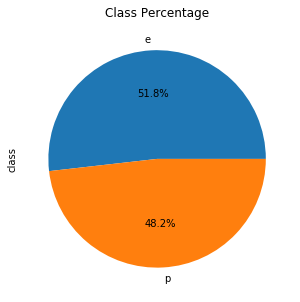

In [8]:
dataset['class'].value_counts().plot(
    kind='pie',
    autopct='%1.1f%%',
    figsize=(5,5)
)
plt.title("Class Percentage")

### persentage of class
- Poisonous = 1 have 48,2%
- Eatable = 0 have 51,8%

Text(0.5, 1.0, 'Cap Shape of Mushroom')

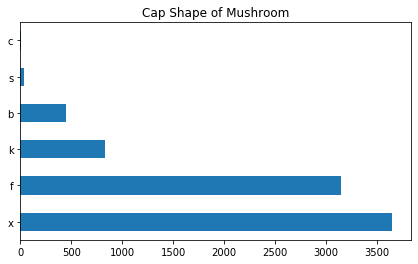

In [9]:
dataset['cap-shape'].value_counts().plot(
    kind='barh',
    figsize=(7,4)
)
plt.title("Cap Shape of Mushroom")

### Cap-Shape
cap-shape have 6 shape :
- conical=c
- sunken=s
- bell=b
- knobbed=k
- flat=f
- convex=x
- Convex is the most of cap-shape 

### Encoding categorical data
### Label encoding

In [10]:
#label encoding
Encoder_X = LabelEncoder() 
for col in X.columns:
    X[col] = Encoder_X.fit_transform(X[col])
Encoder_y=LabelEncoder()
y = Encoder_y.fit_transform(y)

In [11]:
X.head()

,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,5,2,4,1,6,1,0,1,4,0,...,2,7,7,0,2,1,4,2,3,5
1,5,2,9,1,0,1,0,0,4,0,...,2,7,7,0,2,1,4,3,2,1
2,0,2,8,1,3,1,0,0,5,0,...,2,7,7,0,2,1,4,3,2,3
3,5,3,8,1,6,1,0,1,5,0,...,2,7,7,0,2,1,4,2,3,5
4,5,2,3,0,5,1,1,0,4,1,...,2,7,7,0,2,1,0,3,0,1


In [12]:
y

array([1, 0, 0, ..., 0, 1, 0])

# Poisonous = 1
# Eatable = 0

### Getting dummy variables

In [13]:
X=pd.get_dummies(X,columns=X.columns,drop_first=True)
print(X.shape)

(8124, 95)


### Splitting the dataset into the Training set and Test set

In [14]:
# split data training and data test

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3,
    random_state = 0
)

print("training size : ", X_train.shape[0])
print("test size : ", X_test.shape[0])

training size :  5686
test size :  2438


### Feature Scaling

In [15]:
#featuring scaling

sc = StandardScaler()

X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

### Applying PCA with  n_components = 2

In [16]:
#applying PCA with 2 component
pca = PCA(n_components=2)

X_train = pca.fit_transform(X_train)
X_test = pca.transform(X_test)

In [17]:
#check training size and test size

print("training size : ", X_train.shape)
print("test size : ", X_test.shape)

training size :  (5686, 2)
test size :  (2438, 2)


### Function to train model

In [18]:
# function for train the model

def train_model(model, X_train, X_test, y_train, y_test):
    model.fit(X_train, y_train)
    train_pred = model.predict(X_train)
    train_acc = model.score(X_train, y_train)
    
    test_pred = model.predict(X_test)
    test_acc = model.score(X_test, y_test)
    
    print("------ training performance -----")
    print("target : ", y_train[:10])
    print("prediction : ", train_pred[:10])
    print("accuracy score : ", train_acc)
    
    print("------ test performance -----")
    print("target : ", y_test[:10])
    print("prediction : ", test_pred[:10])
    print("accuracy score : ", test_acc)
    
    print(classification_report(y_test, test_pred))

In [19]:
# check shape of X_test and y_test

print(X_test.shape)
print(y_test.shape)

(2438, 2)
(2438,)


In [20]:
# train the model 

logistics = LogisticRegression(random_state=0)
knn = KNeighborsClassifier()
svc = SVC(random_state=0)
dtree = DecisionTreeClassifier(random_state=0)
forest = RandomForestClassifier(random_state=0)
bayes = GaussianNB()

for model in [logistics, knn, svc, dtree, forest, bayes]:
    print("Training : ", model.__class__)
    train_model(model, X_train, X_test, y_train, y_test)
    print('---------')

Training :  <class 'sklearn.linear_model.logistic.LogisticRegression'>
------ training performance -----
target :  [1 0 1 0 1 0 1 0 0 1]
prediction :  [1 0 0 0 1 0 0 0 0 1]
accuracy score :  0.900984875131903
------ test performance -----
target :  [1 0 0 0 0 0 1 1 0 1]
prediction :  [0 0 0 0 0 0 0 1 0 1]
accuracy score :  0.9138638228055783
              precision    recall  f1-score   support

           0       0.88      0.97      0.92      1272
           1       0.96      0.85      0.90      1166

    accuracy                           0.91      2438
   macro avg       0.92      0.91      0.91      2438
weighted avg       0.92      0.91      0.91      2438

---------
Training :  <class 'sklearn.neighbors.classification.KNeighborsClassifier'>


C:\Users\BRI\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


------ training performance -----
target :  [1 0 1 0 1 0 1 0 0 1]
prediction :  [1 0 1 0 1 0 0 0 0 1]
accuracy score :  0.9424903271192402
------ test performance -----
target :  [1 0 0 0 0 0 1 1 0 1]
prediction :  [0 0 0 0 0 0 1 1 0 1]
accuracy score :  0.9380639868744873
              precision    recall  f1-score   support

           0       0.92      0.96      0.94      1272
           1       0.96      0.91      0.93      1166

    accuracy                           0.94      2438
   macro avg       0.94      0.94      0.94      2438
weighted avg       0.94      0.94      0.94      2438

---------
Training :  <class 'sklearn.svm.classes.SVC'>


C:\Users\BRI\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


------ training performance -----
target :  [1 0 1 0 1 0 1 0 0 1]
prediction :  [1 0 1 0 1 0 0 0 0 1]
accuracy score :  0.925606753429476
------ test performance -----
target :  [1 0 0 0 0 0 1 1 0 1]
prediction :  [0 0 0 0 0 0 1 1 0 1]
accuracy score :  0.9323215750615258
              precision    recall  f1-score   support

           0       0.90      0.98      0.94      1272
           1       0.98      0.88      0.93      1166

    accuracy                           0.93      2438
   macro avg       0.94      0.93      0.93      2438
weighted avg       0.94      0.93      0.93      2438

---------
Training :  <class 'sklearn.tree.tree.DecisionTreeClassifier'>
------ training performance -----
target :  [1 0 1 0 1 0 1 0 0 1]
prediction :  [1 0 1 0 1 0 1 0 0 1]
accuracy score :  1.0
------ test performance -----
target :  [1 0 0 0 0 0 1 1 0 1]
prediction :  [0 0 0 1 0 0 1 1 0 1]
accuracy score :  0.8974569319114027
              precision    recall  f1-score   support

           0 

C:\Users\BRI\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


# Results :
| Classifier | Logistic Reg| KNN | SVC | Naive Bayes | Decision Tree | Random Forest |
| --- | --- | --- | --- | --- | --- | --- |
| Train accuracy score | 0.90098 | 0.94249 | 0.92561 | 0.89219 | 1.00000 | 0.98804 |
| Test accuary score | 0.91386 | 0.93806 | 0.93232 | 0.90689 | 0.89582 | 0.92781 |

# Visualization (Confussion Matrix)

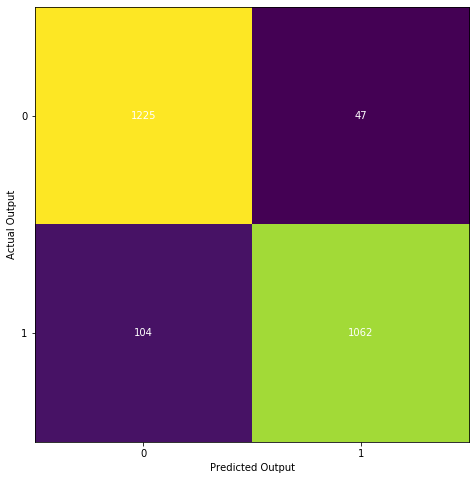

In [21]:
# plot confussion matrix

test_pred = knn.predict(X_test)
cm = confusion_matrix(y_test, test_pred)


fig, ax = plt.subplots(figsize=(8,8))
ax.imshow(cm)
ax.grid(False)
ax.set_xlabel("Predicted Output", color='black')
ax.set_ylabel("Actual Output", color='black')
ax.xaxis.set(ticks=range(2))
ax.yaxis.set(ticks=range(2))
ax.set_ylim(1.5, -0.5)
for i in range(2):
    for j in range(2):
        ax.text(j, i, cm[i,j], ha='center', va='center', color='white')
plt.show()


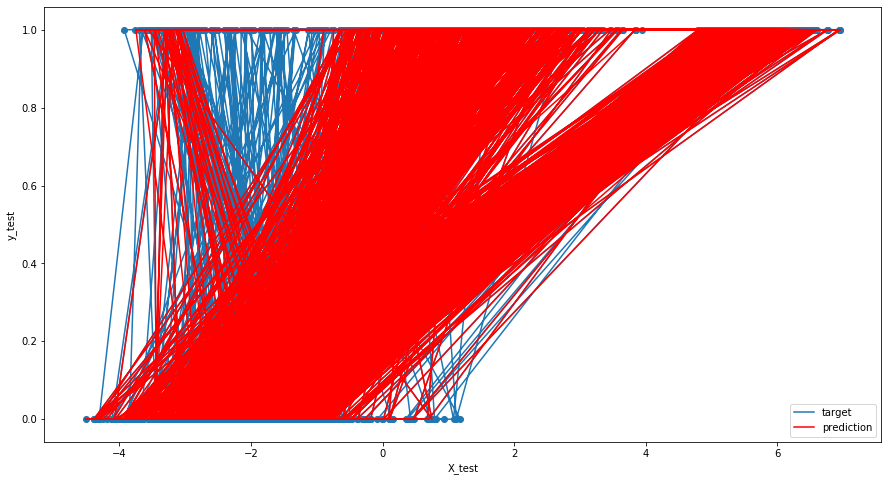

In [22]:
# predict for data testing
y_hat = svc.predict(X_test)

# plot
plt.figure(figsize=(15,8))
plt.plot(X_test[:, 0], y_test, label="target")
plt.plot(X_test[:, 0], y_hat, label="prediction", c="r")
plt.scatter(X_test[:, 0], y_test)

plt.xlabel("X_test")
plt.ylabel("y_test")
plt.legend()
plt.show()

# Conclusion

Berdasarkan hasil akurasi pada tabel diatas dipilih classifier KNN karena memiliki nilai akurasi pada training dan testing lebih tinggi dibandingkan classifier Logistics Regression, SVM, Naive Bayes, Decision Tree, dan Random Forest